In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [7]:
data_copy['market_value'] = data_copy.spx
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [11]:
data_copy['white_noise'] = np.random.normal(loc = data_copy.market_value.mean(),scale = data_copy.market_value.std(),size = len(data_copy))

(0.0, 2300.0)

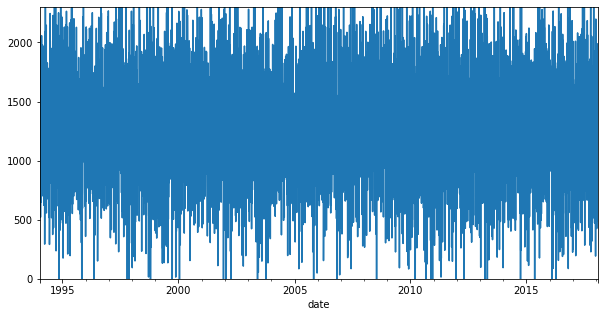

In [17]:
plt.figure(figsize = (10,5))
data_copy.white_noise.plot()
plt.ylim(0,2300)

(0.0, 2300.0)

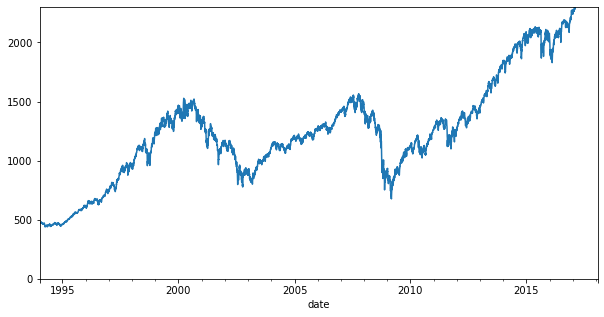

In [16]:
plt.figure(figsize = (10,5))
data_copy.market_value.plot()
plt.ylim(0,2300)

### Random Walk

In [18]:
random_walk_data = pd.read_csv('RandWalk.csv')


In [19]:
random_walk_data.head()

date        price
0  07/01/1994  1122.139662
1  08/01/1994  1135.238562
2  09/01/1994  1109.897831
3  10/01/1994  1080.347860
4  11/01/1994  1082.095245

In [20]:
random_walk_data.date = pd.to_datetime(random_walk_data.date,dayfirst = True)

In [21]:
random_walk_data.set_index('date',inplace = True)
random_walk_data = random_walk_data.asfreq('b')

In [22]:
random_walk_data.head()

price
date                   
1994-01-07  1122.139662
1994-01-10  1080.347860
1994-01-11  1082.095245
1994-01-12  1083.639265
1994-01-13  1067.146255

In [23]:
data_copy['rw'] = random_walk_data.price

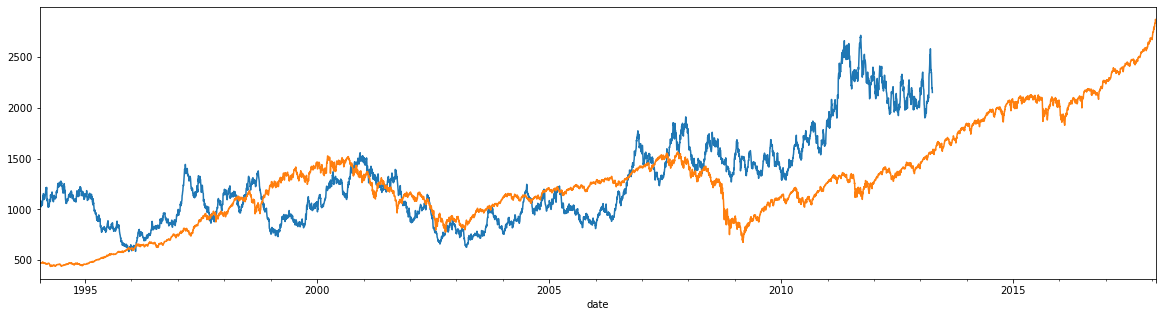

In [32]:
plt.figure(figsize = (20,5))
data_copy.rw.plot()
data_copy.market_value.plot()

### Dickey fuller test for stationarity

In [34]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [35]:
sts.adfuller(data_copy.market_value)

(1.119498638172841,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

first value - test statistic.
second value - p value .
third value - autocorrelation, in this case there is some correlation with 10 lags.
fourth - number of observations

In [37]:
sts.adfuller(data_copy.white_noise)

(-80.01105913453938,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94762.8154426183)

### Seaonality and seasonal decomposition

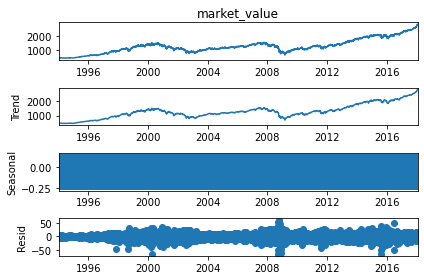

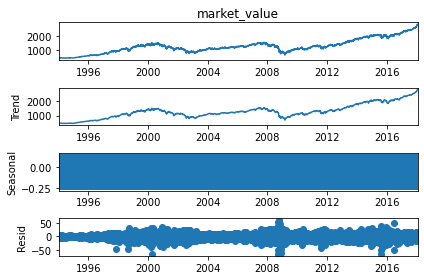

In [38]:
seasonal_decomposition_additive = seasonal_decompose(data_copy.market_value, model = 'additive')
seasonal_decomposition_additive.plot()

Additive decomposition suggests no seasonality

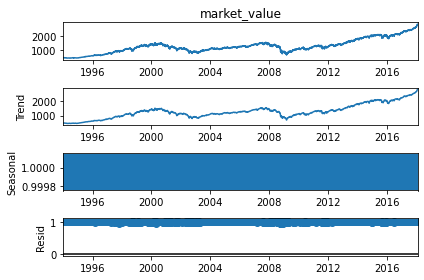

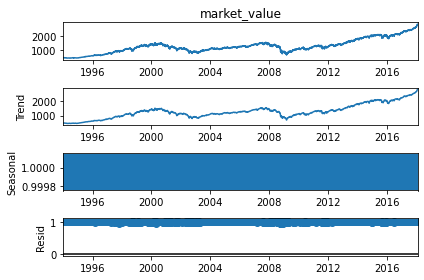

In [40]:
seasonality_decomposition_multiplicative = seasonal_decompose(data_copy.market_value,model ='multiplicative')
seasonality_decomposition_multiplicative.plot()